<a href="https://colab.research.google.com/github/MINJI-95236/2024_data-science/blob/main/0527_name_colab_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 안전한 도시 구현을 위한 서울시 인구수와 cctv수 간의 데이터분석

## ※ 깃허브에서 population_seoul.csv 와 cctv_seoul.csv 파일을 다운로드 한 다음, 코랩으로 불러와 주세요.

In [ ]:
# 시각화 진행을 위한 글꼴 설치
# 이 코드는 실행 후, 반드시 상단의 [런타임]-[세션 다시 시작]을 진행한다음에 다음 코드부터 실행해주세요!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 아래 코드를 그대로 반드시 실행해주세요.
import pandas as pd #필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [ ]:
# 아래 코드를 그대로 반드시 실행해주세요.
plt.rcParams['font.family'] = 'NanumGothic' # 나눔고딕 적용하기
plt.rcParams['axes.unicode_minus'] = False # 음수부호 오류 처리하기

## (1) 자치구별 cctv수 데이터 파악 및 전처리

In [ ]:
# 아래 코드를 그대로 반드시 실행해주세요.
cctv =pd.read_csv('cctv_seoul.csv')
cctv.head()

In [ ]:
#컬럼별 결측치 갯수 조회하기
#아래 코드를 그대로 반드시 실행해주세요.
cctv.isnull().sum()

### (미션) cctv 데이터프레임의 일부 컬럼명을 아래와 같이 바꿔주세요.(단, 원본 데이터도 같이 바뀔 것)


*   구분 → 자치구
*   총계 → CCTV수

In [ ]:
#아래 칸에 위 미션에 관한 코드를 직접 작성 후 실행하세요.





In [ ]:
#컬럼명이 제대로 잘 바뀌었는지 확인하기
# 아래 코드를 그대로 반드시 실행해주세요.
cctv.head()

In [ ]:
#자치구별 CCTV수가 가장 많은 순서대로 출력하기
# 아래 코드를 그대로 반드시 실행해주세요.
cctv.sort_values('CCTV수',ascending=False).head()

In [ ]:
#자치구별 CCTV수가 가장 적은 순서대로 출력하기
# 아래 코드를 그대로 반드시 실행해주세요.
cctv.sort_values('CCTV수').head()

### (미션) cctv데이터프레임에 '최근증가율'이라는 컬럼을 새로 생성 후 추가하세요. 최근증가율 생성을 위한 식은 아래와 같습니다.
* 최근증가율 = 2021년cctv수+2022년cctv수+2023년cctv수 / 2021년이전 CCTV수 * 100

In [ ]:
cctv['최근증가율']=(                                          )/cctv['2021년이전'] *100

In [ ]:
#컬럼이 제대로 잘 추가되었는지 확인하기
#아래 코드를 그대로 반드시 실행해주세요.
cctv.head()

In [ ]:
#'2021년이전~2023년'불필요한 컬럼 삭제
#아래 코드를 그대로 반드시 실행해주세요.
cctv.drop(columns=['2021년이전','2021년','2022년','2023년'],inplace=True)

In [ ]:
#컬럼이 제대로 잘 삭제되었는지 확인하기
# 아래 코드를 그대로 반드시 실행해주세요.
cctv.head()

In [ ]:
#자치구별 CCTV수 최근증가율이 가장 높은 순서대로 출력하기
#아래 코드를 그대로 반드시 실행해주세요.
cctv.sort_values('최근증가율',ascending=False).head()

In [ ]:
#자치구별 CCTV수 최근증가율이 가장 낮은 순서대로 출력하기
#아래 코드를 그대로 반드시 실행해주세요.
cctv.sort_values('최근증가율').head()

## (2) 자치구별 인구수 데이터 파악 및 전처리

In [ ]:
#아래 코드를 그대로 반드시 실행해주세요.

population=pd.read_csv('population_seoul.csv')

population.head()

### (미션)population 데이터 프레임의 컬럼명을 아래와 같이 바꿔주세요.(단, 원본 데이터도 같이 바뀔 것)


*   구분 → 자치구
*   계 → 인구수
* 계_한국인 → 한국인
* 계_외국인 → 외국인
* 65세이상고령자 → 고령자



In [ ]:
#아래 칸에 위 미션에 관한 코드를 직접 작성 후 실행하세요.




In [ ]:
#컬럼이 제대로 잘 추가되었는지 확인하기
#아래 코드를 그대로 반드시 실행해주세요.
population.head()

In [ ]:
#자치구별 인구수가 가장 많은 순서대로 출력하기
# 아래 코드를 그대로 반드시 실행해주세요.

population.sort_values('인구수',ascending=False).head()

In [ ]:
#자치구별 인구수가 가장 적은 순서대로 출력하기
# 아래 코드를 그대로 반드시 실행해주세요.

population.sort_values('인구수').head()

## (3) CCTV 데이터와 인구 데이터 합치기

### (미션) cctv 데이터와 인구 데이터를 합쳐 df_result라는 새로운 데이터프레임을 만들고, '자치구'를 인덱스로 지정한 후 출력하기
* cctv수 데이터프레임명: cctv
* 인구수 데이터프레임명: population
* 합쳐진 데이터프레임명: df_result
* 합칠 기준 컬럼명: '자치구'

In [ ]:
#아래 칸에 위 미션에 관한 코드를 직접 작성 후 실행하세요.
df_result =




In [ ]:
#데이터가 잘 합쳐졌는지 조회하여 확인하기
# 아래 코드를 그대로 반드시 실행해주세요.

df_result.head()

In [ ]:
#상관계수 출력
# 아래 코드를 그대로 반드시 실행해주세요.

df_result[['인구수','CCTV수']].corr()

## (4) 데이터 시각화 (아래 코드부터는 모두 실행해주세요)

### 자치구별 인구수 분포 그래프(막대그래프)

In [ ]:
#데이터의 값이 많은 순서대로 가로 막대 그래프를 출력
# 아래 코드를 그대로 반드시 실행해주세요.
plt.figure(figsize=(10, 10))

df_result_sorted = df_result.sort_values('인구수')

plt.barh(df_result_sorted.index, df_result_sorted['인구수'], color='orange')

plt.title('서울시 자치구별 인구수')
plt.xlabel('인구수')
plt.ylabel('구별')
plt.grid(True)

plt.show()

### 자치구별 cctv수 분포 그래프(막대 그래프)

In [ ]:
#데이터의 값이 많은 순서대로 가로 막대 그래프를 출력
# 아래 코드를 그대로 반드시 실행해주세요.
plt.figure(figsize=(10, 10))

df_result_sorted = df_result.sort_values('CCTV수')

plt.barh(df_result_sorted.index, df_result_sorted['CCTV수'], color='orange')

plt.title('서울시 자치구별 CCTV수')
plt.xlabel('CCTV수')
plt.ylabel('구별')
plt.grid(True)

plt.show()

### 자치구별 인구수와 cctv설치수 간의 상관관계 그래프(산점도 그래프)


In [ ]:
# 아래 코드를 그대로 반드시 실행해주세요.
plt.figure(figsize=(10, 10))

plt.scatter(df_result['인구수'],df_result['CCTV수'],color = 'blue')

plt.title('서울시 CCTV수와 인구수의 상관관계')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid(True)

plt.show()

### 자치구별 인구수와 cctv설치수 간의 회귀분석 그래프(산점도+회귀(예측)선 그래프)
*  코드를 실행 한 후, 아래 예시를 참고하여 결과를 알맞게 해석하여 보고서에 작성하세요.

In [ ]:
# 아래 코드를 그대로 반드시 실행해주세요.

plt.figure(figsize=(10,10))

x = np.array(df_result['인구수']).reshape(-1, 1)
y = np.array(df_result['CCTV수']).reshape(-1, 1)

model = LinearRegression().fit(x,y)

plt.scatter(df_result['인구수'],df_result['CCTV수'],color='orange')

pred=model.predict(x)
plt.plot(x,pred,color='r')

plt.title('자치구별 인구수에 따른 CCTV 회귀분석')
plt.xlabel('자치구별 인구수')
plt.ylabel('자치구별 CCTV수')
plt.grid(True)

# 각 점의 잔차 계산
residuals = y - model.predict(x)

# 잔차가 큰 상위 10개 데이터 포인트에 대해 구 이름 추가
top = np.argsort(np.abs(residuals), axis=0)[-10:].flatten()
for n in top:
    plt.text(df_result['인구수'][n], df_result['CCTV수'][n],
             df_result.index[n], fontsize=10)

plt.show()

### ※ 상품별 광고비에 따른 매출액의 회귀분석 그래프 해석(예시)

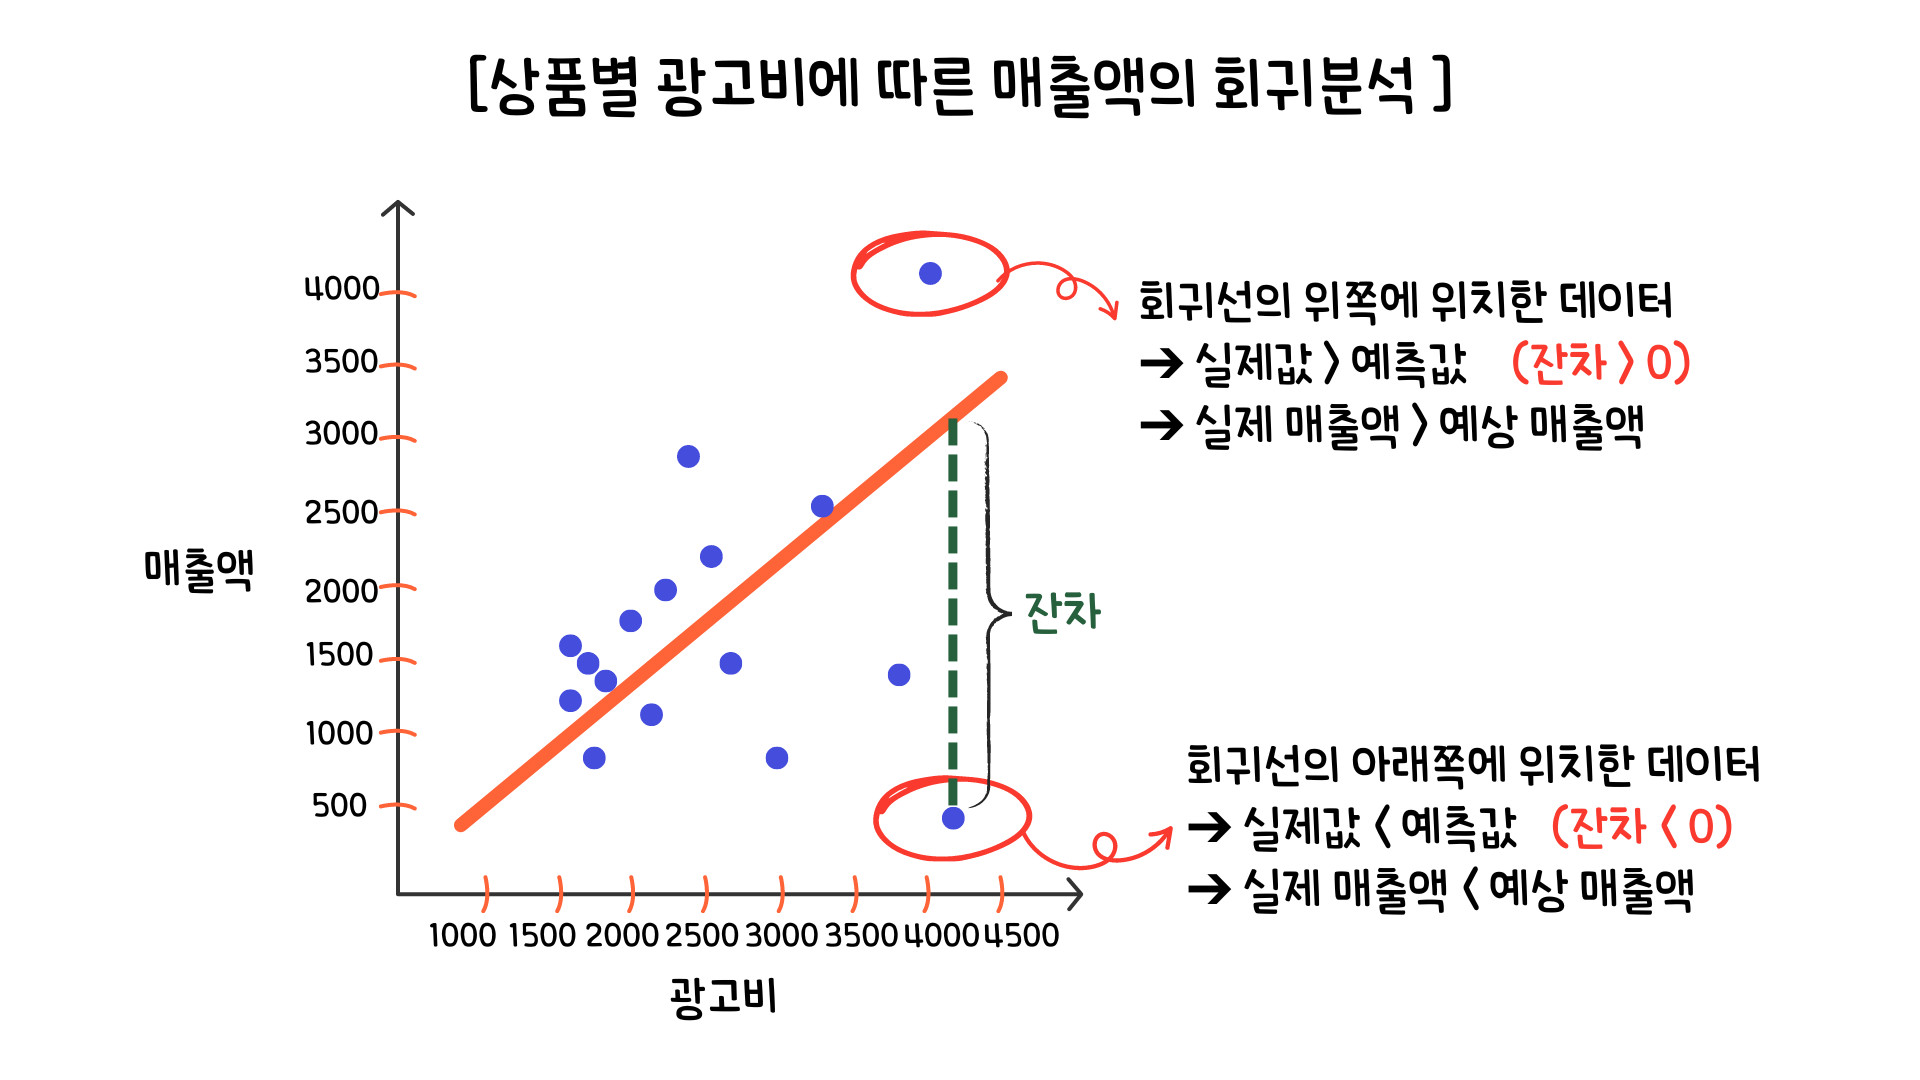